**Descripció**
Crear base de dades amb MySQL.

In [2]:
import mysql.connector
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Nivell 1
**- Exercici 1:**

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

In [3]:
# Conexión a SQL almacenado en local
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="12345678"
)

mycursor = mydb.cursor()

In [ ]:
# Creo la base de datos con nombre Veterninario
mycursor.execute("CREATE DATABASE Veterinario")

In [4]:
# Compruebo que se ha creado la base de datos y muestro todas las que hay en el equipo
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('Veterinario',)


In [5]:
# Selecciono la base de datos Veterinario para conectarme y trabajar en ella
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="12345678",
  database="Veterinario"
)

In [6]:
mycursor = mydb.cursor()

In [7]:
# Creo una tabla para las Mascotas de la clínica en la que se almacenará su ficha
mycursor.execute("CREATE TABLE Mascota (Nombre VARCHAR(255), Especie VARCHAR(255), NombreDueño VARCHAR(255), ApellidoDueño VARCHAR(255),NumeroChip INT)")

In [8]:
# Creo una segunda tabla en la que almacenaremos la ficha de los propietarios de las mascotas
mycursor.execute("CREATE TABLE Familiar (Nombre VARCHAR(255), Apellido VARCHAR(255), DNI VARCHAR(255), Mascota VARCHAR(255))")

In [9]:
# Añado tres registros a la tabla de Mascotas
sql = "INSERT INTO Mascota (Nombre, Especie, NombreDueño, ApellidoDueño, NumeroChip ) VALUES (%s, %s, %s, %s, %s)"
val = [
       ("Lux", "Gato", "Victor", "Calvache", 1),
       ("Ivy", "Gato", "Leia", "Organa", 2),
       ("Blacky", "Perro", "Patti", "Smith", 3)
      ]
mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

3 record inserted.


In [42]:
# Añado tres registros a la tabla de Familiar
sql = "INSERT INTO Familiar (Nombre, Apellido, DNI, Mascota ) VALUES (%s, %s, %s, %s)"
val = [
       ("Victor", "Calvache", "12345678W", "Lux"),
       ("Leia", "Organa", "12345678X", "Ivy"),
       ("Patti", "Smith", "12345678Y", "Blacky")
      ]
mycursor.executemany(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

3 record inserted.


In [7]:
# Compruebo que los datos se han grabado correctamente en la tabla de mascotas
db= MySQLdb.connect(host="localhost",
                    user="root",
                    password="12345678",
                    database="Veterinario")

mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM Familiar")
myresult = mycursor.fetchall()


print(tabulate(myresult, headers=['Nombre', 'Apellido', 'DNI', 'Mascota'], tablefmt='psql'))

+----------+------------+-----------+-----------+
| Nombre   | Apellido   | DNI       | Mascota   |
|----------+------------+-----------+-----------|
| Victor   | Calvache   | 12345678W | Lux       |
| Leia     | Organa     | 12345678X | Ivy       |
| Patti    | Smith      | 12345678Y | Blacky    |
+----------+------------+-----------+-----------+


In [8]:
# Compruebo que los datos se han grabado correctamente en la tabla de familiares
db= MySQLdb.connect(host="localhost",
                    user="root",
                    password="12345678",
                    database="Veterinario")

mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM Mascota")
myresult = mycursor.fetchall()


print(tabulate(myresult, headers=['Nombre', 'Especie', 'NombreDueño', 'ApellidoDueño', 'NumeroChip'], tablefmt='psql'))

+----------+-----------+---------------+-----------------+--------------+
| Nombre   | Especie   | NombreDueño   | ApellidoDueño   |   NumeroChip |
|----------+-----------+---------------+-----------------+--------------|
| Lux      | Gato      | Victor        | Calvache        |            1 |
| Ivy      | Gato      | Leia          | Organa          |            2 |
| Blacky   | Perro     | Patti         | Smith           |            3 |
+----------+-----------+---------------+-----------------+--------------+


### Nivell 2

**- Exercici 2:**

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [18]:
# Cuento la cantidad de Gatos que tiene la tabla Mascota
cats="SELECT COUNT(Especie) FROM Mascota WHERE Especie=\"Gato\" "
mycursor.execute(cats)
cats=mycursor.fetchall()
print('Total Gatos :',cats)

Total Gatos : [(2,)]


In [19]:
# Cuento la cantidad de Perros que tiene la tabla Mascota
dogs="SELECT COUNT(Especie) FROM Mascota WHERE Especie=\"Perro\" "
mycursor.execute(dogs)
dogs=mycursor.fetchall()
print('Total Perros :',dogs)

Total Perros : [(1,)]


In [21]:
# Almaceno la cantidad de Gatos y Perros  en un diccionario 
all_cats = (cats[0][0])
all_dogs = (dogs[0][0])

values = {
  'Cats': [all_cats],
  'Dogs': [all_cats]
}

In [22]:
# Convierto el diccionario en un Data Frame de Pandas
df = pd.DataFrame(values)

In [23]:
print(df)

   Cats  Dogs
0     2     2


### Nivell 3

**- Exercici 3:**

Genera algun gràfic que resumeixi les dades. 

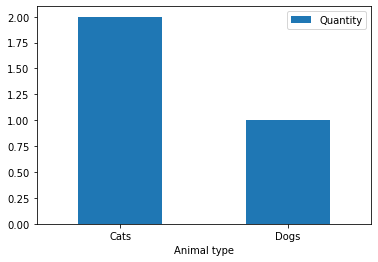

In [17]:
# Creo un gráfico de barras que muestra la cantidad de especies distintas de animales de la clínica 
df = pd.DataFrame({'Animal type':['Cats', 'Dogs'], 'Quantity':[all_cats, all_dogs]})
ax = df.plot.bar(x='Animal type', y='Quantity', rot=0)